In [171]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy import stats

## #1
 Построчно​ ​ считать​ ​ *.jsonl​ ​ файл,​ ​ вывести​ ​ все​ ​ типы​ ​ событий,​ ​ подсчитать
количество​ ​ их​ ​ вхождений​ ​ и ​ ​ сохранить​ ​ в ​ ​ файл​ ​ types.json​ .

In [2]:
data = pd.read_json("match-data.jsonl",lines=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1320297 entries, 0 to 1320296
Data columns (total 65 columns):
assists                     68050 non-null float64
attackerhero                63952 non-null float64
attackerillusion            63952 non-null float64
attackername                63952 non-null object
attackerteam                53208 non-null float64
camps_stacked               68050 non-null float64
creeps_stacked              68050 non-null float64
deaths                      68050 non-null float64
denies                      68050 non-null float64
ehandle                     131 non-null float64
entityleft                  131 non-null float64
firstblood_claimed          68050 non-null float64
gold                        68050 non-null float64
gold_reason                 2608 non-null float64
health                      54030 non-null float64
hero_id                     54030 non-null float64
hero_inventory              54030 non-null object
hero_stash                 

In [3]:
pd.DataFrame(data.type.unique(),columns=["unique_types"]).to_json("types.json")

## #2
События​ ​ типа​ ​ “cursor”​ ​ фиксируют​ ​ положение​ ​ курсора​ ​ на​ ​ экране​ ​ игрока.​ ​ Игрок
идентифицируется​ ​ полем​ ​ slot.​ ​ В ​ ​ любом​ ​ матче​ ​ игрок​ ​ располагается​ ​ на​ ​ одном​ ​
из
10​ ​
доступных​ ​ слотов,​ ​ соответственно​ ​ его​ ​ slot​ ​ ∈ [ 0, 9] .​ ​ Все​ ​ остальные​ ​ значения
данного​ ​ поля​ ​ идентифицируют​ ​ комментаторов​ ​ и ​ ​ обсерверов​ ​ матча.​ ​ Для
каждого​ ​ игрока​ ​ необходимо​ ​ нарисовать​ ​ heatmap​ ​ положений​ ​ его​ ​ курсора​ ​ в
течение​ ​ всего​ ​ матча.​ ​ Результат​ ​ сохранить​ ​ в ​ ​ файлы​ ​ heatmap_slot_name.png .

In [4]:
data.slot.dropna().shape[0]/data.shape[0]

0.9513314049793342

Оставим только данные для $slot \in [0,9]$

In [5]:
slot_data = data.dropna(subset=["slot"])
slot_data = slot_data[slot_data.slot.apply(lambda x: x in range(10))]

Рассмотрим slot 0

In [6]:
grouped_data = slot_data.groupby(by="slot")

In [7]:
user_data = grouped_data.get_group(0)
user_data.head()

,assists,attackerhero,attackerillusion,attackername,attackerteam,camps_stacked,creeps_stacked,deaths,denies,ehandle,...,unit_list,value,valuename,vec_x,vec_y,x,xp,xp_reason,y,z
12,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
42,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
84,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
116,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
142,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [8]:
cursor_data = user_data[user_data.type == "cursor"]
heatmap_data = cursor_data[["x","y"]]

In [9]:
def create_hexbin_image(slot_number,heatmap_data):
    fig, ax = plt.subplots()
    hex_ax = ax.hexbin(x=heatmap_data['x'], y=heatmap_data['y'],
                       gridsize=25, cmap="jet")
    fig.colorbar(hex_ax)
    plt.savefig("heatmap_{0}.png".format(slot_number))
    plt.gca().invert_xaxis()

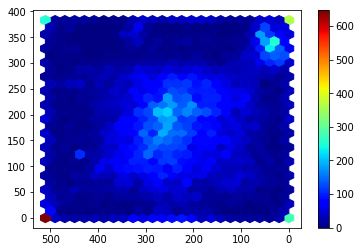

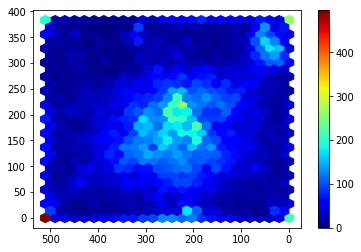

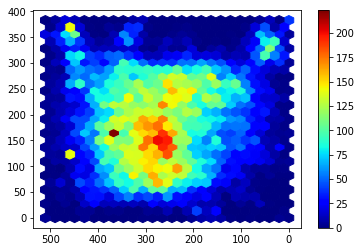

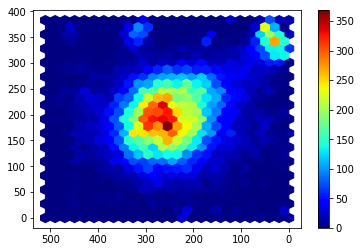

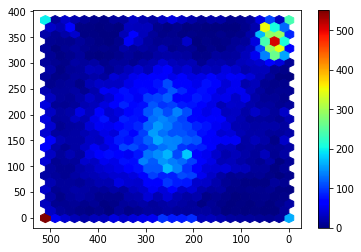

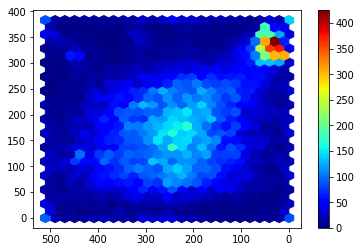

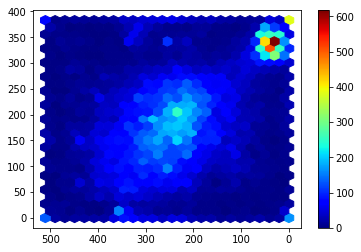

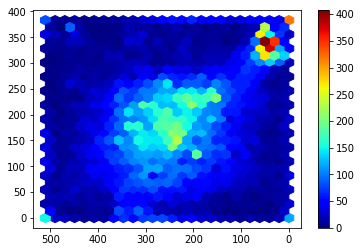

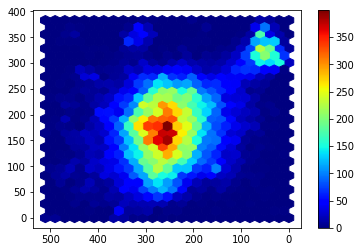

In [10]:
for i in range(9):
    user_data = grouped_data.get_group(i)
    heatmap_data = user_data[user_data.type == "cursor"][["x","y"]]
    create_hexbin_image(i,heatmap_data)


## #3
Портал​ ​ https://www.opendota.com/​​ ​ предоставляет​ ​ доступ​ ​ к ​ ​ базе​ ​ данных​ ​ с
анализами​ ​ профессиональных​ ​ матчей​ ​ Dota​ ​ 2.​ ​ Необходимо​ ​ составить
SQL-запросы​ ​ к ​ ​ базе​ ​ данных​ ​ для​ ​ выгрузки​ ​ 1000​ ​ профессиональных​ ​ матчей​ ​ за
последний​ ​ патч​ ​ 7.07​ ​ с ​ ​ https://www.opendota.com/explorer​ , ​ ​ а ​ ​ также​ ​ 1000
последних​ ​ матчей​ ​ из​ ​ прошлого​ ​ патча​ ​ 7.06.​ ​ Среди​ ​ всех​ ​ матчей​ ​ выбрать​ ​ те,​ ​ в
которых​ ​ есть​ ​ герой​ ​ Anti-Mage​ ​ (hero_id​ ​ = ​ ​ 1).​ ​ Для​ ​ данного​ ​ героя​ ​ нужно​ ​ вывести
значение​ ​ времени​ ​ покупки​ ​ предмета​ ​ battle​ ​ fury​ ​ (‘bfury’​ ​ в ​ ​ purchase_log)​ ​ от​ ​ начала
матча.​ ​ Далее​ ​ необходимо​ ​ провести​ ​ статистический​ ​ тест​ ​ для​ ​ проверки​ ​ гипотезы
о​ ​ том,​ ​ что​ ​ в ​ ​ среднем​ ​ время​ ​
покупки​ ​ предмета​ ​ для​ ​ обоих​ ​ патчей​ ​ одинаково.
API:​ ​ https://docs.opendota.com/
Схема​ ​ БД:​ ​ https://github.com/odota/core/blob/master/sql/create_tables.sql

In [89]:
import requests

def parse_response(response):
    rows = pd.read_json(response.content.decode("utf-8"),lines=True)["rows"][0]
    result = pd.DataFrame(rows)
    return result

def get_sql(filename):
    with open(filename) as file:
        sql = file.read().replace('\n',' ')
    return sql

response = requests.get('https://api.opendota.com/api/explorer',params={"sql":get_sql("select_antimage_7_07_patch.sql")})
print(response)
last_patch_data = parse_response(response)
response = requests.get('https://api.opendota.com/api/explorer',params={"sql":get_sql("select.sql")})
print(response)
prev_patch_data = parse_response(response)

<Response [200]>
<Response [200]>


In [91]:
last_patch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 3 columns):
match_id        132 non-null int64
patch           132 non-null object
purchase_log    131 non-null object
dtypes: int64(1), object(2)
memory usage: 3.2+ KB


In [92]:
prev_patch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 3 columns):
match_id        333 non-null int64
patch           333 non-null object
purchase_log    327 non-null object
dtypes: int64(1), object(2)
memory usage: 7.9+ KB


In [106]:
def extract_bfury_logs(log):
    if not (log is None):
        bfury_logs = list(filter(lambda x: "bfury" == x["key"],log))
        if(len(bfury_logs)<1):
            return None
        return bfury_logs[0]["time"]
    else:
        return None

In [107]:
last_patch_data["bfury_log"] = last_patch_data.purchase_log.apply(extract_bfury_logs)
prev_patch_data["bfury_log"] = prev_patch_data.purchase_log.apply(extract_bfury_logs)
last_patch_data.dropna(inplace=True)
prev_patch_data.dropna(inplace=True)

In [117]:
prev_patch_data.bfury_log.describe()

count     321.000000
mean      968.685358
std       128.383498
min       664.000000
25%       875.000000
50%       967.000000
75%      1041.000000
max      1413.000000
Name: bfury_log, dtype: float64

In [118]:
last_patch_data.bfury_log.describe()

count     127.000000
mean      857.598425
std       124.647392
min       587.000000
25%       754.000000
50%       852.000000
75%       933.000000
max      1297.000000
Name: bfury_log, dtype: float64

[]

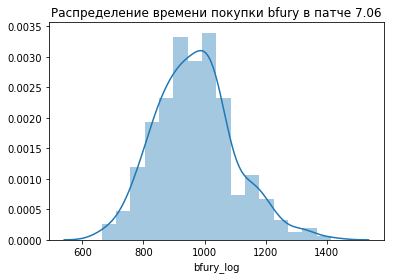

In [155]:
ax = sns.distplot(prev_patch_data.bfury_log)
ax.set_title("Распределение времени покупки bfury в патче 7.06")
ax.plot()

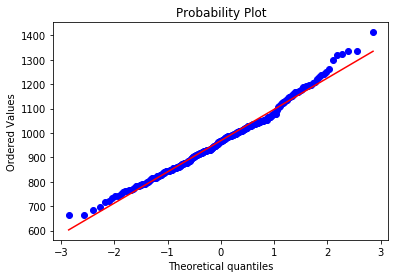

In [174]:
qqplot = stats.probplot(prev_patch_data.bfury_log, dist="norm", plot=plt)

[]

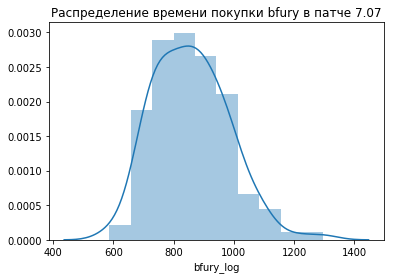

In [154]:
ax = sns.distplot(last_patch_data.bfury_log)
ax.set_title("Распределение времени покупки bfury в патче 7.07")
ax.plot()

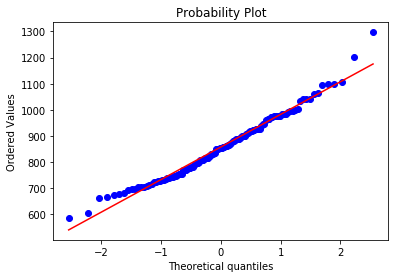

In [175]:
qqplot = stats.probplot(last_patch_data.bfury_log, dist="norm", plot=plt)

Text(0.5,1,'Оба распределения')

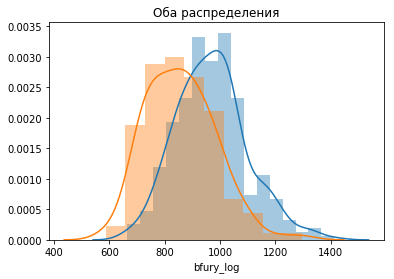

In [157]:
ax = sns.distplot(prev_patch_data.bfury_log)
sns.distplot(last_patch_data.bfury_log)
ax.set_title("Оба распределения")scipy

In [120]:
from scipy.stats import shapiro

shapiro(prev_patch_data.bfury_log)

(0.9871982932090759, 0.006135671399533749)

In [121]:
shapiro(last_patch_data.bfury_log)

(0.9794225692749023, 0.050184376537799835)

** Нет оснований отклонить гипотезу о соответствии данных нормальному распределению(для обоих патчей) ** 

 Гипотеза: распределения имеют одинаковую дисперсию. Уровень значимости 0.05
     
 Проверим с помощью F test

In [186]:
F_stat = prev_patch_data.bfury_log.var()/last_patch_data.bfury_log.var()

df1 = prev_patch_data.bfury_log.shape[0] - 1 
df2 = last_patch_data.bfury_log.shape[0] - 1 
p_value = stats.f.cdf(F_stat,df1,df2)

print(p_value)

0.64554752048


**Нет оснований для отклонения гипотезы об идентичности дисперсий двух распределений**

Таким образом имеет место допущение о том, что мы имеем два нормальных распределений с одинаковой дисперсий.

Гипотеза: распределения имеют одинаковое среднее. Уровень значимости 0.05  
Используем t test для проверки

In [180]:
stats.ttest_ind(prev_patch_data.bfury_log,last_patch_data.bfury_log)

Ttest_indResult(statistic=8.3217854503274591, pvalue=1.0667201136564248e-15)

Гипотеза об идентичности средних откланяется, т.к. pvalue < 0.05